# Experimento 3 - Comparação com ReAct com Prompt Enriquecido

**Objetivo**: Avaliar se a separação explícita da etapa de personalização, proposta no \textit{PersonaReAct}, resulta em respostas mais organizadas, concisas e claras do que a personalização direta por prompt no ReAct tradicional.

**Metodologia**
* Escolher 4 perfis diferentes
* Escolher 1 pergunta para cada perfil
  * Responder cada pergunta com o ReAct com Prompt Enriquecido e com o PersonaReAct
* Submeter o par de respostas (com ReAct com Prompt Enriquecido e com o PersonaReAct) à LLM avaliadora.

Critérios de avaliação da LLM:
* Adequação ao Perfil,
* Uso de Informações Relevantes,
* Tom e Estilo Adequados,
* Clareza na Comunicação,
* Personalização Explícita,
* Seleção de Dados Relevantes,
* Ausencia de Alucinações

Cada critério foi aplicado 20 vezes para cada resposta e uma média foi calculada.

# Importação de bibliotecas

In [137]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Importação dos Resultados

O arquivo de resultados é composto pelas pontuações (scores) geradas pelo G-Eval para cada um dos 7 critérios elaborados.

A pergunta foi feita utilizando o padrão ReAct e o padrão PersonaReAct para cada perfil listado abaixo.

Cada pontuação foi calculada 20 vezes e os seus resultados salvos nas listas ```scores_personareact``` e ```scores_react_prompt```.

## Torcedor do time

Pergunta: "Bruno Pacheco foi bem no jogo contra o Ceará no dia 1º de abril de 2023 ou deixou a desejar?"


In [138]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_torcedor.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.36,8.29,1.07
1,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.24,8.23,1.01
2,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.26,8.18,1.08
3,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.21,8.26,0.95
4,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.33,8.26,1.07


In [139]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdequacaoAoPerfil,9.25,0.06,8.30,0.07
1,AusenciaDeAlucinacoes,6.51,0.17,7.96,0.16
2,ClarezaNaComunicacao,9.31,0.06,8.67,0.02
3,PersonalizacaoExplicita,9.10,0.10,6.97,0.20
4,SelecaoDeDadosRelevantes,8.82,0.05,8.29,0.06
5,TomEEstiloAdequado,9.21,0.09,8.68,0.05
6,UsoDeInformacoesRelevantes,9.27,0.06,8.14,0.16


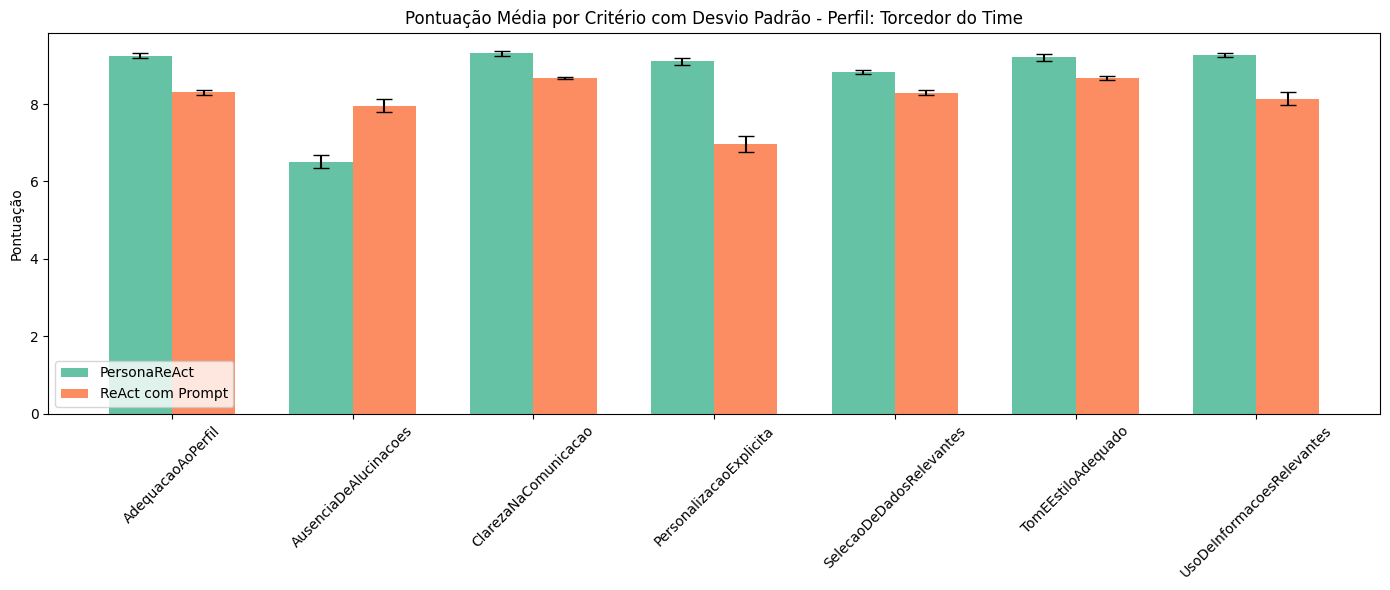

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Torcedor do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [141]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,AdequacaoAoPerfil,9.25,8.30,1.672210e-21,✅
1,UsoDeInformacoesRelevantes,9.27,8.14,1.349699e-16,✅
2,TomEEstiloAdequado,9.21,8.68,5.018755e-16,✅
3,ClarezaNaComunicacao,9.31,8.67,2.698035e-20,✅
4,PersonalizacaoExplicita,9.10,6.97,1.925633e-20,✅
5,SelecaoDeDadosRelevantes,8.82,8.29,1.265668e-17,✅
6,AusenciaDeAlucinacoes,6.51,7.96,9.481496e-17,✅


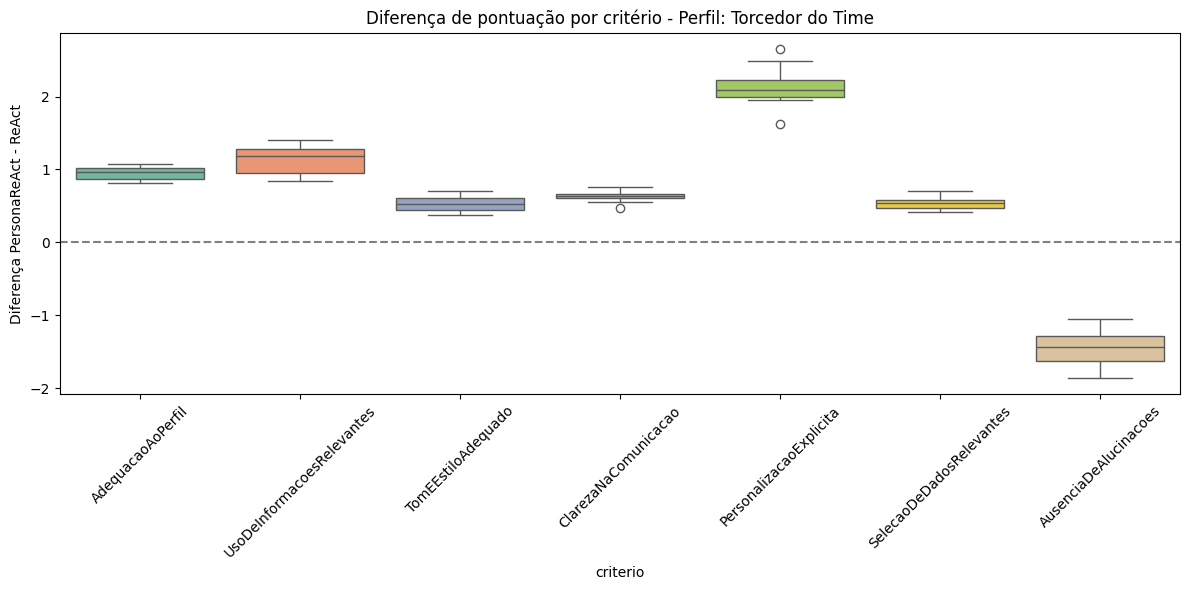

In [142]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Torcedor do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

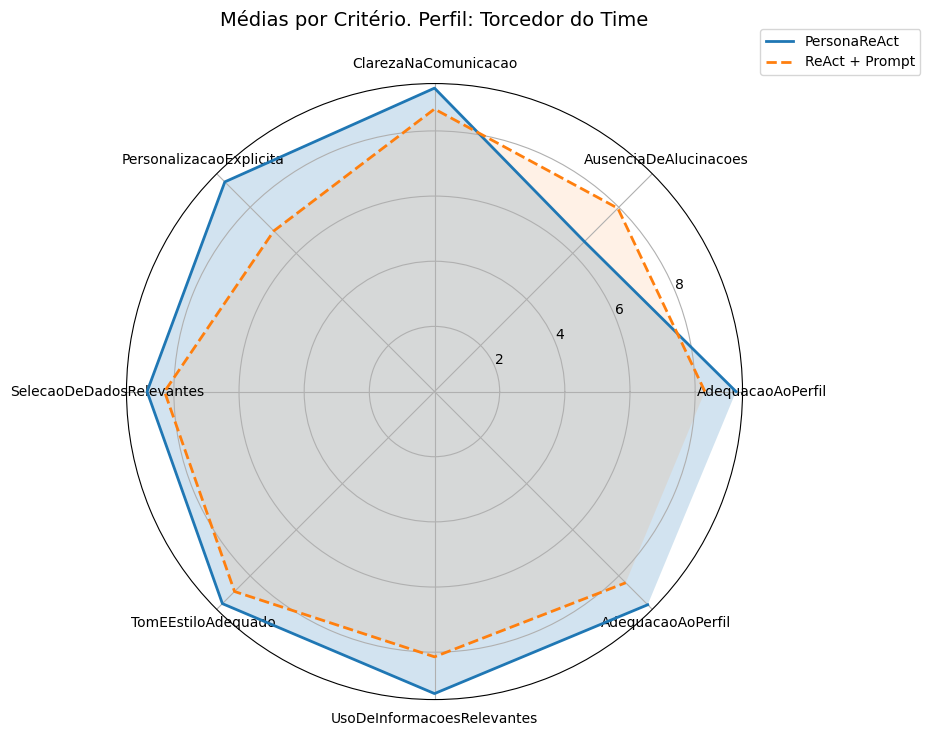

In [143]:
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]
categorias += [categorias[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Torcedor do Time", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

## Técnico do Time

Pergunta: "Qual jogador percorreu mais distância em alta intensidade durante a partida contra o Ceará no dia 1º de abril de 2023?"

In [144]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_tecnico.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Qual jogador percorreu mais distância em alta ...,Técnico do Time,AdequacaoAoPerfil,9.56,9.97,-0.41
1,Qual jogador percorreu mais distância em alta ...,Técnico do Time,AdequacaoAoPerfil,9.38,9.99,-0.61
2,Qual jogador percorreu mais distância em alta ...,Técnico do Time,AdequacaoAoPerfil,9.38,9.97,-0.59
3,Qual jogador percorreu mais distância em alta ...,Técnico do Time,AdequacaoAoPerfil,9.27,9.96,-0.69
4,Qual jogador percorreu mais distância em alta ...,Técnico do Time,AdequacaoAoPerfil,9.27,9.96,-0.69


In [145]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdequacaoAoPerfil,9.35,0.11,9.97,0.01
1,AusenciaDeAlucinacoes,5.65,0.07,10.00,0.00
2,ClarezaNaComunicacao,9.01,0.03,9.97,0.00
3,PersonalizacaoExplicita,9.39,0.06,9.38,0.29
4,SelecaoDeDadosRelevantes,9.12,0.09,10.00,0.00
5,TomEEstiloAdequado,9.09,0.07,9.89,0.07
6,UsoDeInformacoesRelevantes,9.18,0.05,10.00,0.00


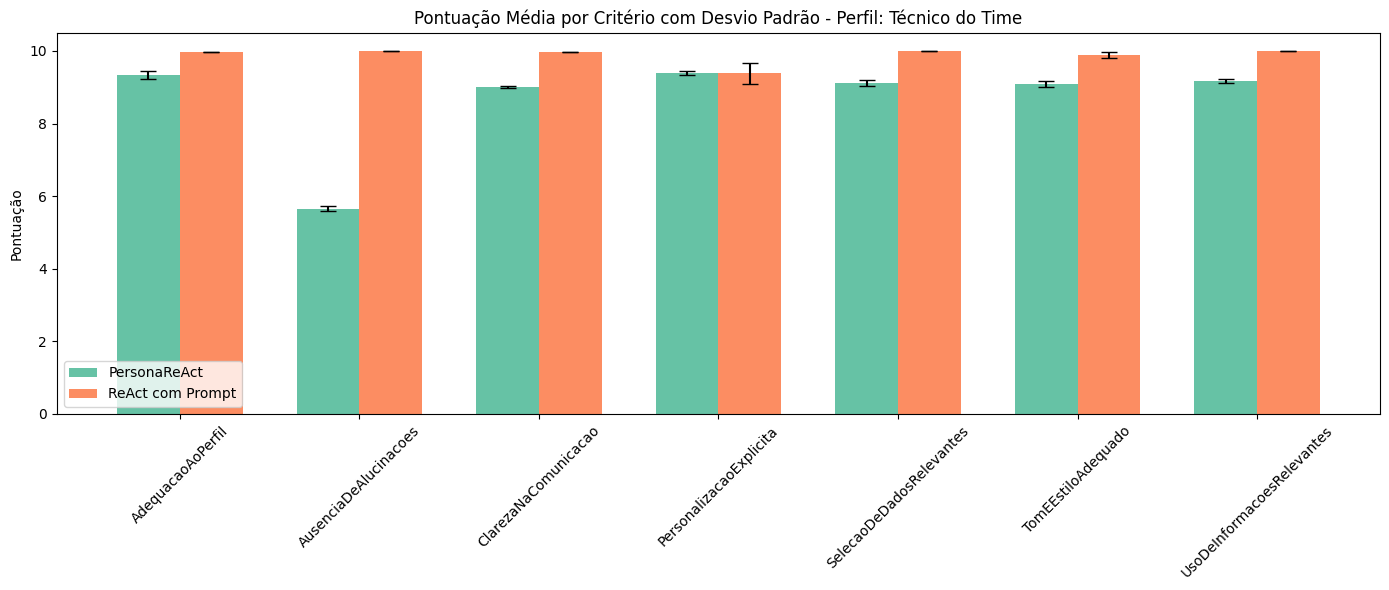

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Técnico do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [147]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,AdequacaoAoPerfil,9.35,9.97,7.448304e-16,✅
1,UsoDeInformacoesRelevantes,9.18,10.00,2.791063e-24,✅
2,TomEEstiloAdequado,9.09,9.89,2.941501e-18,✅
3,ClarezaNaComunicacao,9.01,9.97,1.962689e-30,✅
4,PersonalizacaoExplicita,9.39,9.38,8.920215e-01,❌
5,SelecaoDeDadosRelevantes,9.12,10.00,2.044570e-20,✅
6,AusenciaDeAlucinacoes,5.65,10.00,4.609854e-36,✅


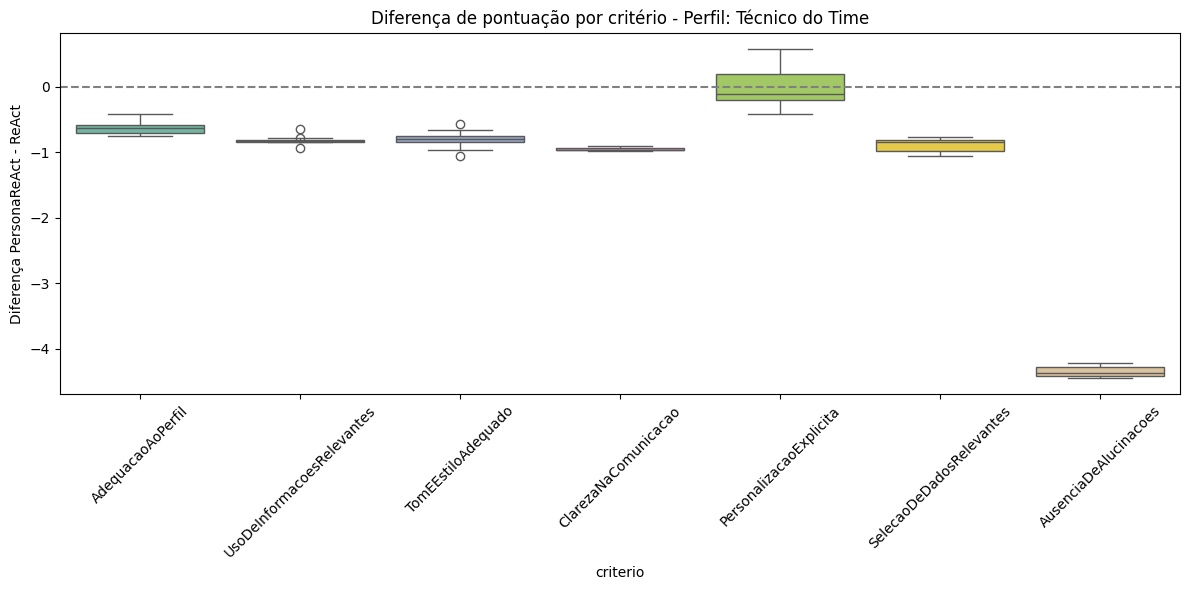

In [148]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Técnico do Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

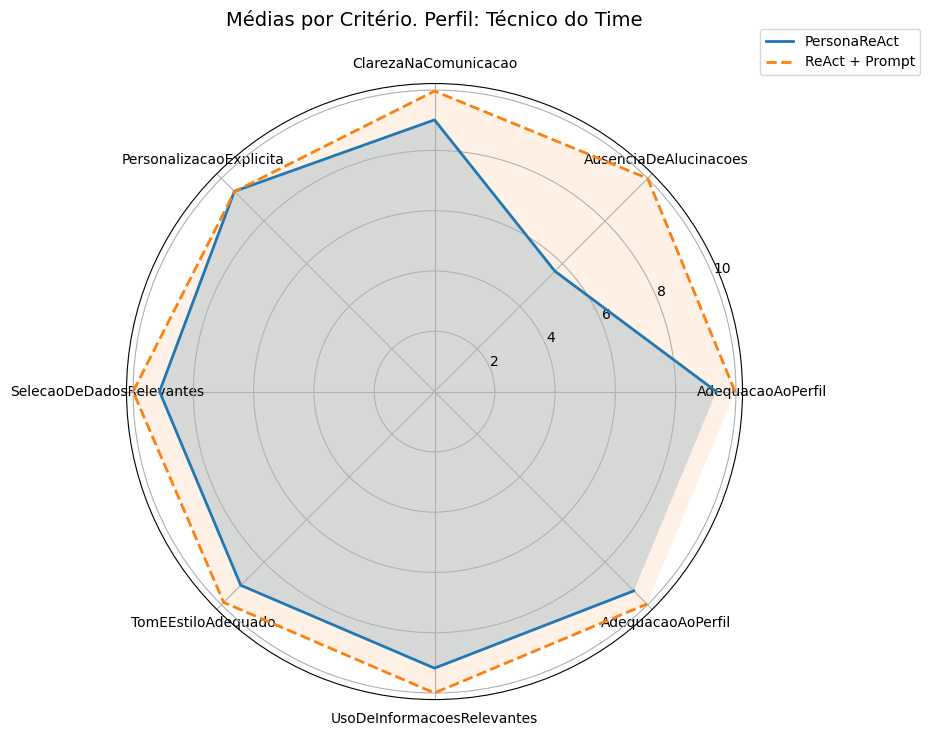

In [149]:
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]
categorias += [categorias[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Técnico do Time", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

## Narrador de Rádio

Pergunta: "Quais jogadores aceleraram o ritmo do jogo no dia 1º de abril de 2023 com suas arrancadas e dribles?"

In [124]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_narrador.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,AdequacaoAoPerfil,9.36,9.46,-0.10
1,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,AdequacaoAoPerfil,9.29,9.53,-0.24
2,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,AdequacaoAoPerfil,9.30,9.54,-0.24
3,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,AdequacaoAoPerfil,9.31,9.46,-0.15
4,Quais jogadores aceleraram o ritmo do jogo no ...,Narrador de Jogo de Futebol,AdequacaoAoPerfil,9.29,9.53,-0.24


In [125]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdequacaoAoPerfil,9.46,0.20,9.51,0.03
1,AusenciaDeAlucinacoes,8.85,0.29,10.00,0.00
2,ClarezaNaComunicacao,9.56,0.06,9.88,0.02
3,PersonalizacaoExplicita,9.73,0.07,9.85,0.04
4,SelecaoDeDadosRelevantes,9.11,0.05,9.80,0.02
5,TomEEstiloAdequado,9.11,0.04,8.97,0.17
6,UsoDeInformacoesRelevantes,8.58,0.05,9.17,0.05


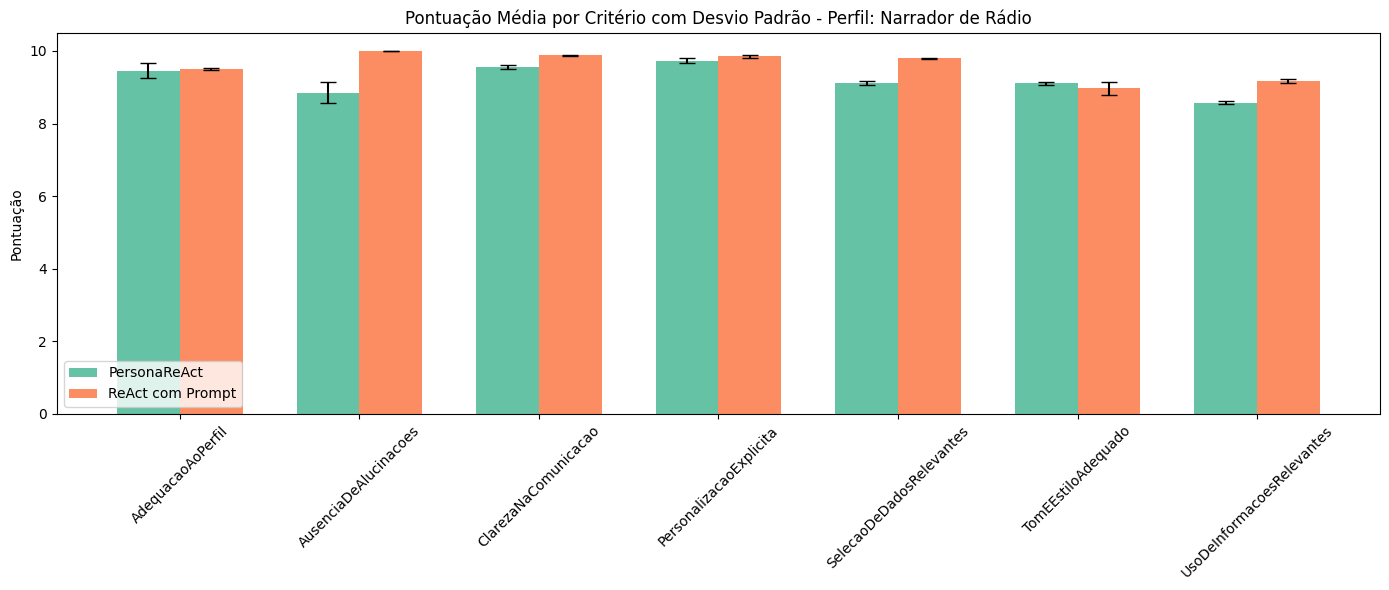

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Narrador de Rádio")
ax.legend()
plt.tight_layout()
plt.show()

In [127]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,AdequacaoAoPerfil,9.46,9.51,2.827555e-01,❌
1,UsoDeInformacoesRelevantes,8.58,9.17,1.125540e-20,✅
2,TomEEstiloAdequado,9.11,8.97,1.909493e-03,✅
3,ClarezaNaComunicacao,9.56,9.88,4.810819e-15,✅
4,PersonalizacaoExplicita,9.73,9.85,7.044009e-06,✅
5,SelecaoDeDadosRelevantes,9.11,9.80,9.162873e-23,✅
6,AusenciaDeAlucinacoes,8.85,10.00,2.962938e-13,✅


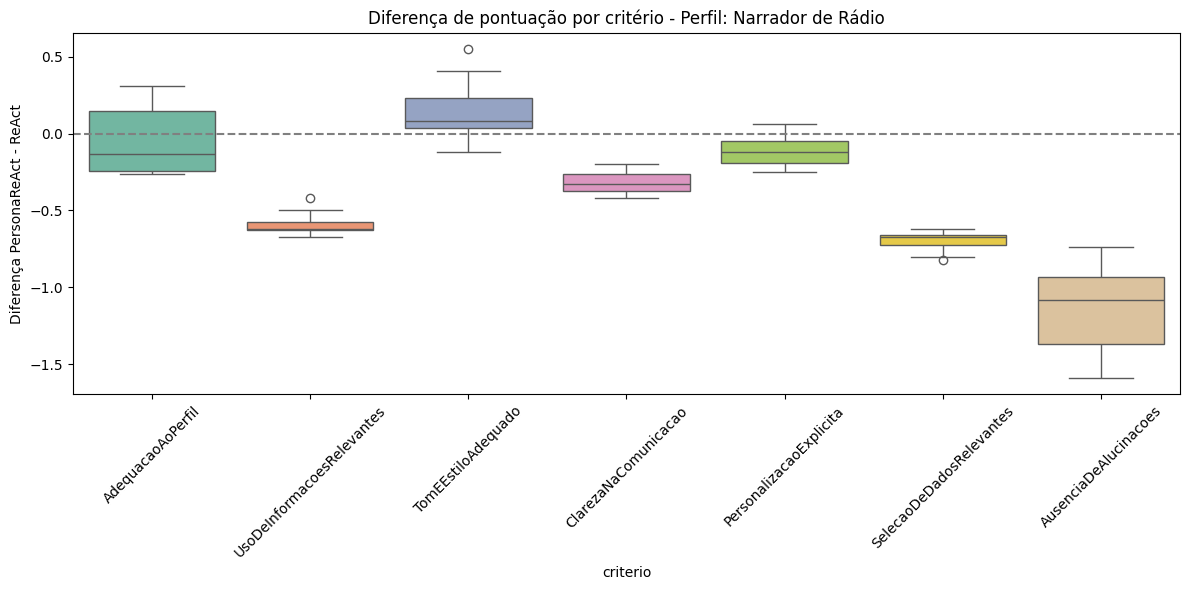

In [128]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Narrador de Rádio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

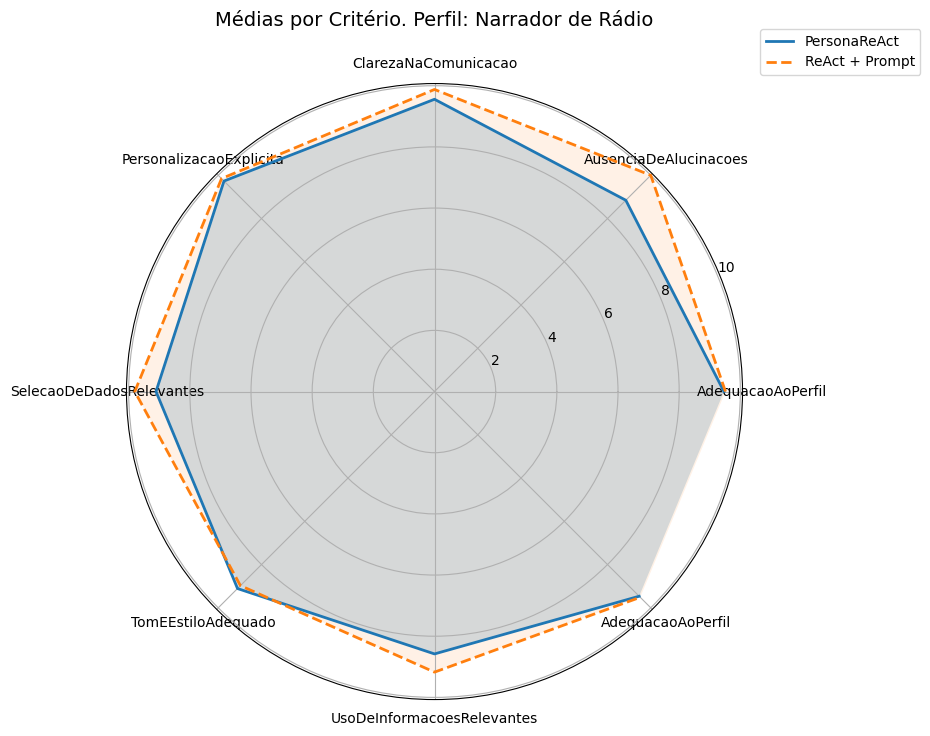

In [129]:
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]
categorias += [categorias[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Narrador de Rádio", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

## Jornalista Esportivo

Pergunta: "O que mais chamou atenção no desempenho de Bruno Pacheco no jogo contra o Ceará no dia 1º de abril de 2023?"

In [130]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_jornalista.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_p, score_r in zip(item['scores_personareact'], item['scores_react_prompt']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "score_personareact": score_p,
            "score_react_prompt": score_r,
            "diferenca": score_p - score_r
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,score_personareact,score_react_prompt,diferenca
0,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,AdequacaoAoPerfil,9.59,9.23,0.36
1,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,AdequacaoAoPerfil,9.68,9.26,0.42
2,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,AdequacaoAoPerfil,9.53,9.25,0.28
3,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,AdequacaoAoPerfil,9.50,9.29,0.21
4,O que mais chamou atenção no desempenho de Bru...,Jornalista Esportivo,AdequacaoAoPerfil,9.68,9.25,0.43


In [131]:
agrupado = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,PersonaReAct_Média,PersonaReAct_DP,ReAct_Média,ReAct_DP
0,AdequacaoAoPerfil,9.65,0.09,9.30,0.07
1,AusenciaDeAlucinacoes,7.92,0.09,9.98,0.02
2,ClarezaNaComunicacao,9.36,0.06,9.38,0.05
3,PersonalizacaoExplicita,7.41,0.24,5.96,0.13
4,SelecaoDeDadosRelevantes,9.32,0.07,8.95,0.06
5,TomEEstiloAdequado,9.06,0.09,9.31,0.07
6,UsoDeInformacoesRelevantes,8.82,0.04,8.32,0.11


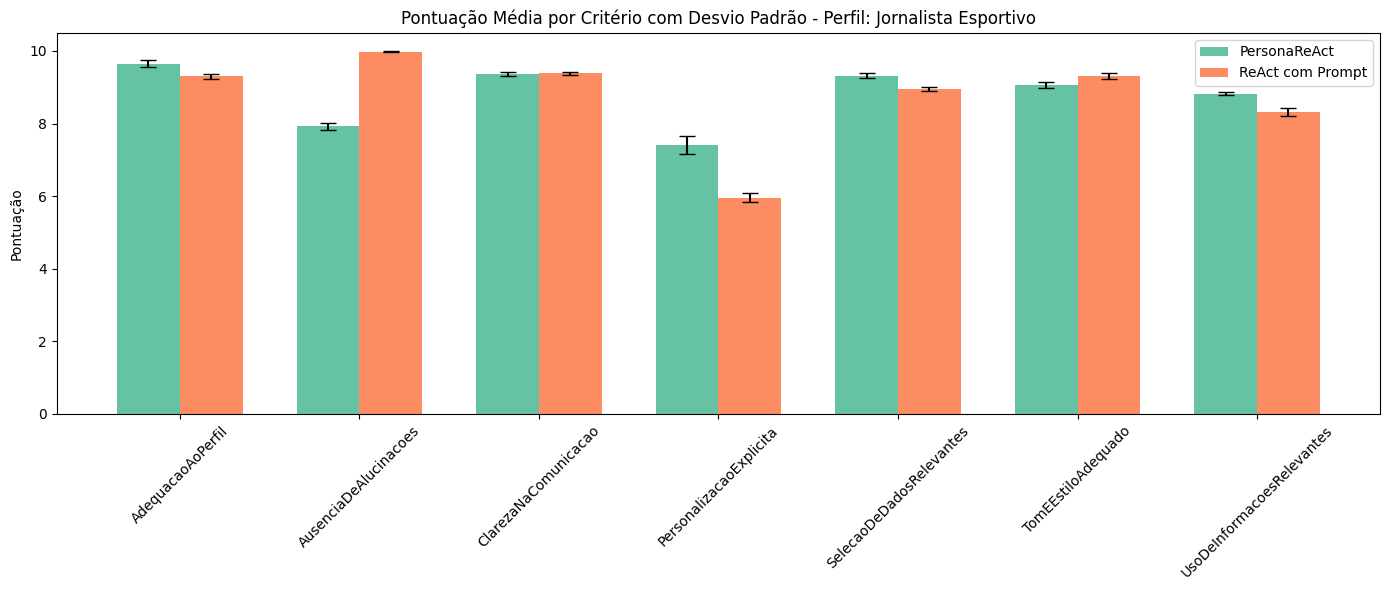

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado df_agg com as colunas:
# ['criterio', 'PersonaReAct_Média', 'PersonaReAct_DP', 'ReAct_Média', 'ReAct_DP']

# Define as posições dos grupos
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define as larguras das barras
largura = 0.35

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para PersonaReAct
ax.bar(
    x - largura / 2,
    agrupado['PersonaReAct_Média'],
    width=largura,
    yerr=agrupado['PersonaReAct_DP'],
    capsize=6,
    label='PersonaReAct',
    color="#66c2a5"
)

# Barras para ReAct com Prompt
ax.bar(
    x + largura / 2,
    agrupado['ReAct_Média'],
    width=largura,
    yerr=agrupado['ReAct_DP'],
    capsize=6,
    label='ReAct com Prompt',
    color="#fc8d62"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Jornalista Esportivo")
ax.legend()
plt.tight_layout()
plt.show()

In [134]:
resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]
    stat, p = ttest_rel(subset["score_personareact"], subset["score_react_prompt"])
    resultados_teste.append({
        "Critério": criterio,
        "Média PersonaReAct": round(subset["score_personareact"].mean(), 2),
        "Média ReAct": round(subset["score_react_prompt"].mean(), 2),
        "Valor-p": p,
        "Significativo (α=0.05)": "✅" if p < 0.05 else "❌"
    })

pd.DataFrame(resultados_teste)

,Critério,Média PersonaReAct,Média ReAct,Valor-p,Significativo (α=0.05)
0,AdequacaoAoPerfil,9.65,9.29,8.955491e-11,✅
1,UsoDeInformacoesRelevantes,8.82,8.32,2.010204e-13,✅
2,TomEEstiloAdequado,9.06,9.31,8.722505e-09,✅
3,ClarezaNaComunicacao,9.36,9.38,2.141107e-01,❌
4,PersonalizacaoExplicita,7.41,5.96,1.995505e-15,✅
5,SelecaoDeDadosRelevantes,9.32,8.95,9.643884e-15,✅
6,AusenciaDeAlucinacoes,7.92,9.98,1.745456e-27,✅


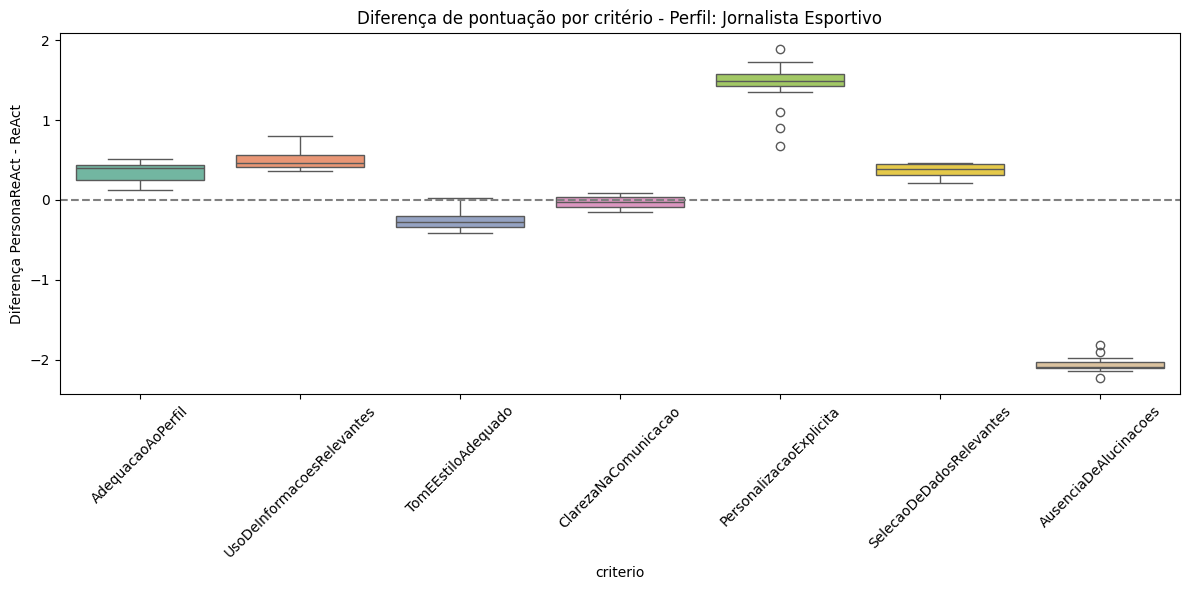

In [135]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="criterio", y="diferenca", hue="criterio", palette="Set2", legend=False)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Diferença PersonaReAct - ReAct")
plt.title("Diferença de pontuação por critério - Perfil: Jornalista Esportivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

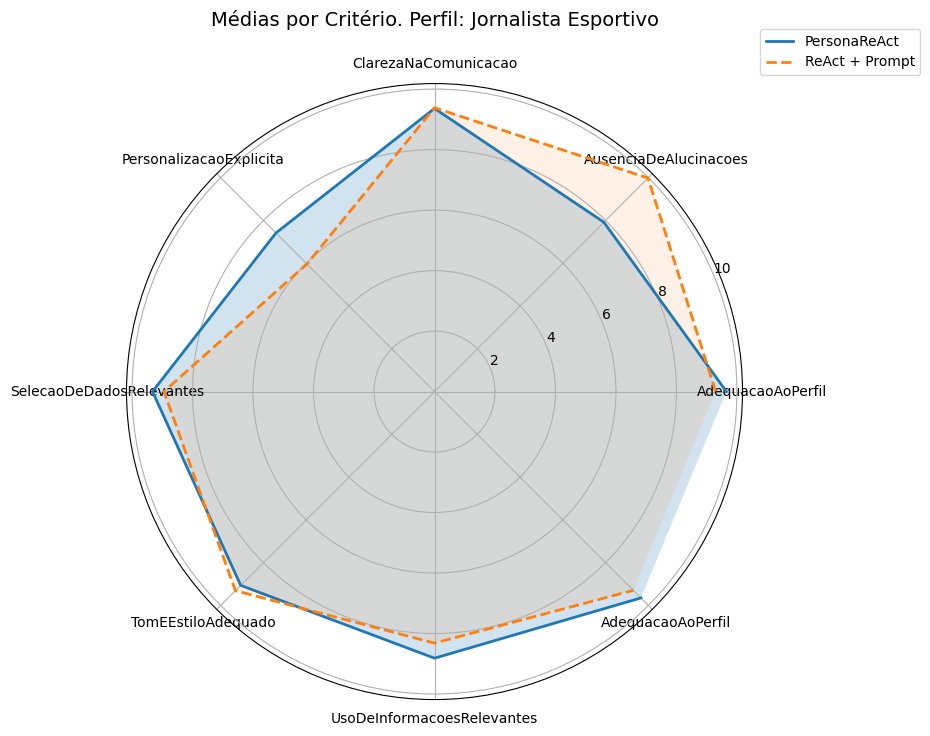

In [136]:
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["score_personareact", "score_react_prompt"]].mean().reset_index()

# Preparar dados para o radar chart
categorias = media_por_criterio["criterio"].tolist()
valores_personareact = media_por_criterio["score_personareact"].tolist()
valores_react = media_por_criterio["score_react_prompt"].tolist()

# Fechar o círculo do radar
valores_personareact += [valores_personareact[0]]
valores_react += [valores_react[0]]
categorias += [categorias[0]]

# Ângulos do gráfico
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plotar os dados
ax.plot(angles, valores_personareact, linewidth=2, linestyle='solid', label='PersonaReAct')
ax.fill(angles, valores_personareact, alpha=0.2)

ax.plot(angles, valores_react, linewidth=2, linestyle='dashed', label='ReAct + Prompt')
ax.fill(angles, valores_react, alpha=0.1)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Médias por Critério. Perfil: Jornalista Esportivo", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()